# Project Bimbingan Karir Data Science

### Table of Contents
* [1) Pengumpulan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Validasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Konstruksi Data](#h6)
* [7) Menentukan label data](#h7)
* [8) Modelling](#h8)
* [9) Evaluasi](#h9)


## 1) Pengumpulan Data <a class="anchor" id="h1"></a>

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction

Dataset yang dipakai adalah dataset dengan nama file "AIDS_Classification.csv". diharapkan sebelum memakai dataset tersebut Anda dapat membaca deskripsi, konteks, beserta informasi atribut dataset pada tautan tersebut.

Dataset ini berisi statistik perawatan kesehatan dan informasi kategoris tentang pasien yang telah didiagnosis mengidap AIDS. Dataset ini awalnya diterbitkan pada tahun 1996.

Nama kolom yang tertera di Dataframe sangat tidak sesuai

## 2) Menelaah Data <a class="anchor" id="h2"></a>

pilih dan masukan library yang anda butuhkan untuk menelaah data

In [ ]:
import numpy as np # untuk komputasi numerik (matematika, array, statistik).
import pandas as pd # untuk manipulasi dan analisis data dalam format tabel.

# Menampilkan semua kolom dari dataframe saat mencetak dataframe
pd.set_option("display.max_columns", None)

### Load Data

masukkan dataset yang dibutuhkan dengan alamat penyimpanan yang tepat dan simpan kedalam sebuah variabel

In [ ]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive # library untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') # mount Google Drive agar file di dalamnya dapat diakses.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengecek file dalam directory
!ls "/content/drive/My Drive/Colab Notebooks/BK/Latihan LSP" # menampilkan daftar file/direktori untuk memastikan file tersedia

AIDS_dirty.csv


In [ ]:
# dir adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
dir =  '/content/drive/My Drive/Colab Notebooks/BK/Latihan LSP/AIDS_dirty.csv' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

Baca dataset csv dengan library pandas

In [ ]:
# Membaca dan menampilkan dataset
data = pd.read_csv(dir) # membaca file CSV dari path yang telah didefinisikan sebelumnya.
data

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48.0,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422.0,477,566,324,0
1,1002,3,61.0,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162.0,218,392,564,1
2,961,3,45.0,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326.0,274,2063,1893,0
3,1166,3,47.0,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287.0,394,1590,966,0
4,1090,0,43.0,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504.0,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,987,1,150.0,67.8132,0,1,0,100,0,0,65,0,1,1,2,0,1,1,320.0,320,1860,1290,0
2242,1126,3,150.0,78.4728,0,1,0,100,0,1,967,0,1,1,3,0,1,0,365.0,265,1964,1546,0
2243,373,2,31.0,75.2976,0,1,0,100,0,1,1538,0,1,1,3,1,1,1,344.0,291,1607,1543,1
2244,1081,1,40.0,70.0812,0,0,1,80,0,0,0,0,0,0,1,0,1,1,400.0,550,1250,1020,0


In [ ]:
data.head() # Menampilkan data 5 baris pertama dataset untuk melihat struktur data.

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48.0,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422.0,477,566,324,0
1,1002,3,61.0,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162.0,218,392,564,1
2,961,3,45.0,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326.0,274,2063,1893,0
3,1166,3,47.0,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287.0,394,1590,966,0
4,1090,0,43.0,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504.0,353,870,782,0


In [ ]:
data.tail() # Menampilkan data 5 baris terakhir dataset.

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2241,987,1,150.0,67.8132,0,1,0,100,0,0,65,0,1,1,2,0,1,1,320.0,320,1860,1290,0
2242,1126,3,150.0,78.4728,0,1,0,100,0,1,967,0,1,1,3,0,1,0,365.0,265,1964,1546,0
2243,373,2,31.0,75.2976,0,1,0,100,0,1,1538,0,1,1,3,1,1,1,344.0,291,1607,1543,1
2244,1081,1,40.0,70.0812,0,0,1,80,0,0,0,0,0,0,1,0,1,1,400.0,550,1250,1020,0
2245,824,1,40.0,68.0400,0,1,0,100,0,0,0,1,1,0,1,0,1,1,477.0,566,542,616,0


menampilan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [ ]:
# Informasi dataset
data.info() # memberikan ringkasan struktur dataset, termasuk tipe data dan jumlah nilai kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2246 non-null   int64  
 1   trt       2246 non-null   int64  
 2   age       2140 non-null   float64
 3   wtkg      2246 non-null   float64
 4   hemo      2246 non-null   int64  
 5   homo      2246 non-null   int64  
 6   drugs     2246 non-null   int64  
 7   karnof    2246 non-null   int64  
 8   oprior    2246 non-null   int64  
 9   z30       2246 non-null   int64  
 10  preanti   2246 non-null   int64  
 11  race      2246 non-null   int64  
 12  gender    2246 non-null   int64  
 13  str2      2246 non-null   int64  
 14  strat     2246 non-null   int64  
 15  symptom   2246 non-null   int64  
 16  treat     2246 non-null   int64  
 17  offtrt    2246 non-null   int64  
 18  cd40      2025 non-null   float64
 19  cd420     2246 non-null   int64  
 20  cd80      2246 non-null   int6

Mendapatkan informasi pada dataset seperti mean, standar deviasi, modus, min, max

In [ ]:
data.describe().T # memberikan statistik deskriptif dataset (mean, std, min, dll.) dan ditranspos (T) agar lebih mudah dibaca

,count,mean,std,min,25%,50%,75%,max
time,2246.0,879.661621,291.643124,14.0,728.2500,997.0000,1090.0000,1231.0
trt,2246.0,51.266251,217.170267,0.0,1.0000,2.0000,3.0000,999.0
age,2140.0,39.268692,28.671949,-5.0,29.0000,34.0000,41.0000,150.0
wtkg,2246.0,90.307937,91.330706,0.1,65.3184,74.1318,83.4468,500.0
hemo,2246.0,0.081923,0.274309,0.0,0.0000,0.0000,0.0000,1.0
homo,2246.0,0.662066,0.473111,0.0,0.0000,1.0000,1.0000,1.0
drugs,2246.0,0.132680,0.339304,0.0,0.0000,0.0000,0.0000,1.0
karnof,2246.0,95.454141,5.912758,70.0,90.0000,100.0000,100.0000,100.0
oprior,2246.0,0.022262,0.147567,0.0,0.0000,0.0000,0.0000,1.0
z30,2246.0,0.548085,0.497793,0.0,0.0000,1.0000,1.0000,1.0


## 3) Validasi Data <a class="anchor" id="h3"></a>
Beberapa fungsi telah tersedia untuk membantumu eksplorasi dataset, deskripsikan temuanmu pada cell Essay!

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.

In [ ]:
import matplotlib.pyplot as plt # visualisasi data (grafik dasar seperti garis, batang).
import seaborn as sns # visualisasi statistik yang lebih menarik dan informatif.

Membuat fungsi untuk memecah variable kategori dan numerik

In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car, num_but_cat).
    return cat_cols, num_cols, cat_but_car, num_but_cat

Membuat fungsi untuk menampilkan visual berdasarkan variabel kategori

In [ ]:
# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()

Analisa variabel numerik

In [ ]:
# Membuat histogram bagi setiap kolom numerik dalam sebuah dataframe
def plot_histograms(dataframe, numeric_columns): # membuat histogram untuk setiap kolom numerik dalam dataset.

    num_cols = len(numeric_columns) # daftar kolom numerik yang akan divisualisasikan.
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20)  # Untuk mengurangi ukurannya, kami mengurangi nilai tempat sampah.
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])  # Jika jumlah kolom tidak habis dibagi 4, hapus sumbu yang berlebihan

    # menampilkan histogram frekuensi untuk setiap kolom numerik.
    plt.tight_layout()
    plt.show()

In [ ]:
# Menganalisis hubungan antara kolom kategorikal dengan target (variabel dependen) dalam sebuah dataframe, dan menyajikan hasilnya dalam bentuk tabel dan visualisasi bar chart
def target_summary_with_cat_visualized(dataframe, target, categorical_col):
    # Rata-rata nilai target dihitung untuk setiap kategori
    grouped_data = dataframe.groupby(categorical_col)[target].mean()

    # Membuat Dataframe dari Hasil Pengelompokan
    summary_df = pd.DataFrame({"TARGET_MEAN": grouped_data})

    # Visualisasi dengan Bar Chart
    plt.figure(figsize=(5, 5))
    summary_df.plot(kind='bar')
    plt.title('Mean Target by ' + categorical_col)
    plt.xlabel(categorical_col)
    plt.ylabel('Mean Target')
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("-"*50)

Target analisa variabel degnan variabel numerik

In [ ]:
# Menganalisis hubungan antara kolom target (kategorikal) dengan kolom numerik dalam sebuah dataframe
def target_summary_with_num_visualized(dataframe, target, numerical_col):
    # Hitung rata-rata dari kolom numerik untuk setiap kategori variabel target
    grouped_data = dataframe.groupby(target)[numerical_col].mean()

    # Membuat diagram batang untuk memvisualisasikan data
    plt.figure(figsize=(5, 5))
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title('Mean ' + numerical_col + ' by ' + target)
    plt.xlabel(target)
    plt.ylabel('Mean ' + numerical_col)
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("-"*50)

Analisa Outlier untuk mengetahui data yang tidak sesuai

In [ ]:
# Membuat visualisasi boxplot (diagram kotak) untuk semua kolom numerik yang diberikan
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 #Menghitung Jumlah Baris Grafik
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) # Membuat grid subplots dengan ukuran yang sesuai
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col]) # Iterasi Kolom Numerik untuk Membuat Boxplot
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    # Penentuan posisi subplot dalam grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) # Menghapus Grafik Kosong

    # Penyesuaian Layout
    plt.tight_layout()
    plt.show()

In [ ]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(data)

Jumlah observasi: 2246
Jumlah variabel: 23
Kolom kategorikal: 15
Kolom Numerik: 8
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 15


### Essay
Deksripsikan temuan anda disini

In [ ]:
# Menampilkan nama kolom yang dikelompokkan
print("\nKolom Kategorikal (cat_cols):")
print(cat_cols)
print("\nKolom Numerik (num_cols):")
print(num_cols)
print("\nKolom Kategorikal dengan Kardinalitas Tinggi (cat_but_car):")
print(cat_but_car)
print("\nKolom Numerik yang Bertindak sebagai Kategorikal (num_but_cat):")
print(num_but_cat)


Kolom Kategorikal (cat_cols):
['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected']

Kolom Numerik (num_cols):
['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

Kolom Kategorikal dengan Kardinalitas Tinggi (cat_but_car):
[]

Kolom Numerik yang Bertindak sebagai Kategorikal (num_but_cat):
['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected']


### Memvisualisasikan distribusi kolom kategorikal

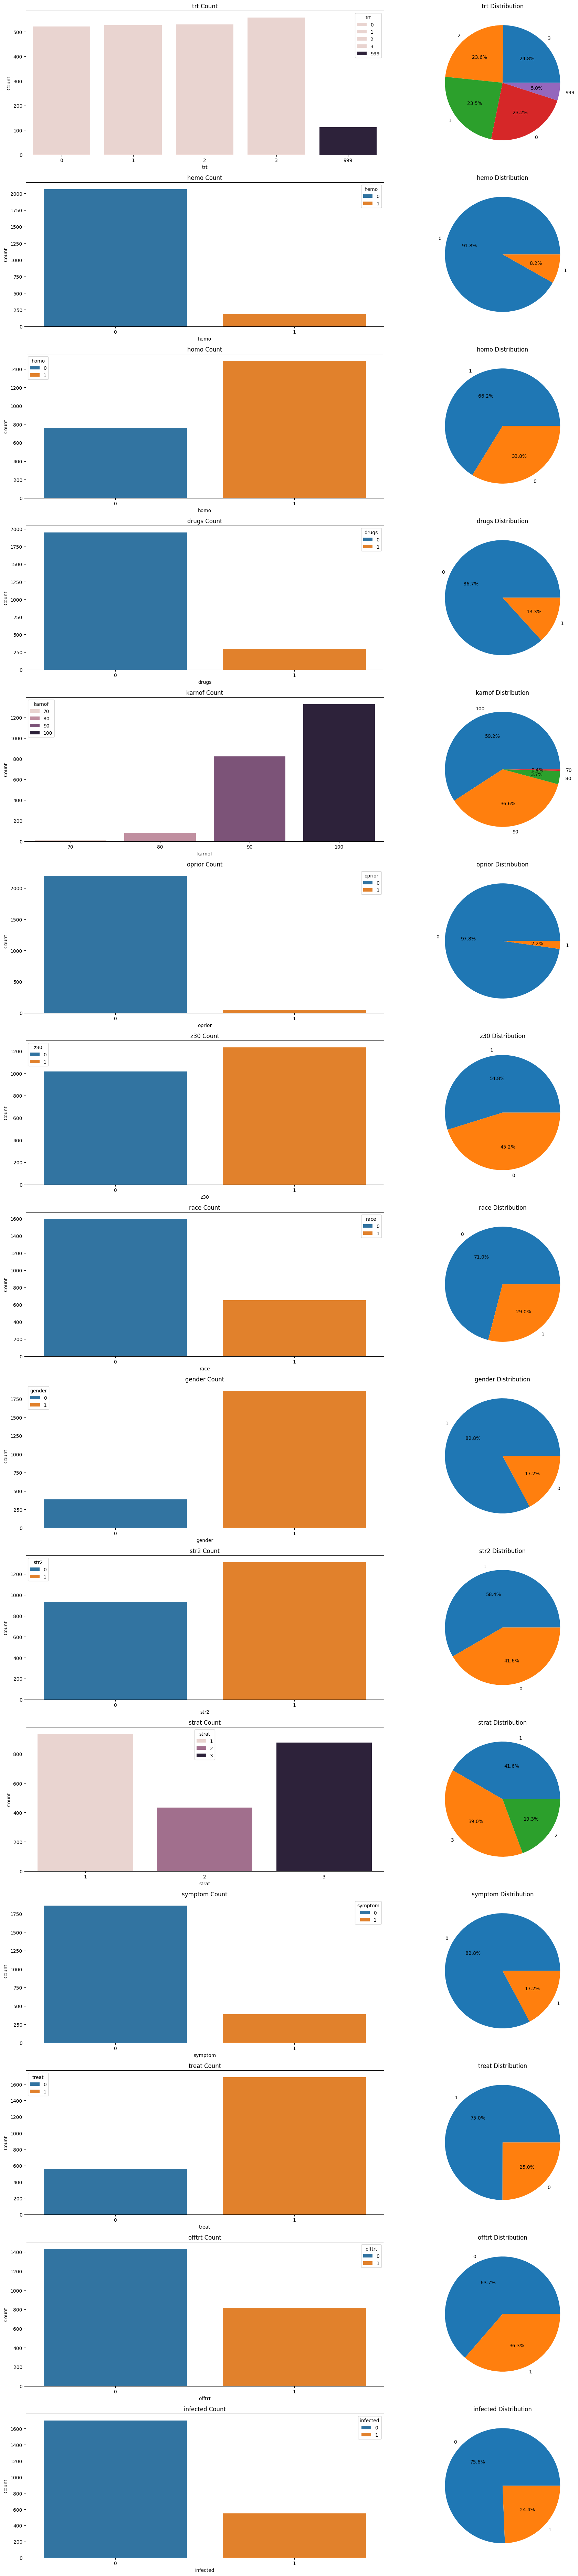

In [ ]:
# Memvisualisasikan distribusi kolom kategorikal
plot_categorical(data, cat_cols)

### Memvisualisasikan distribusi kolom numerik

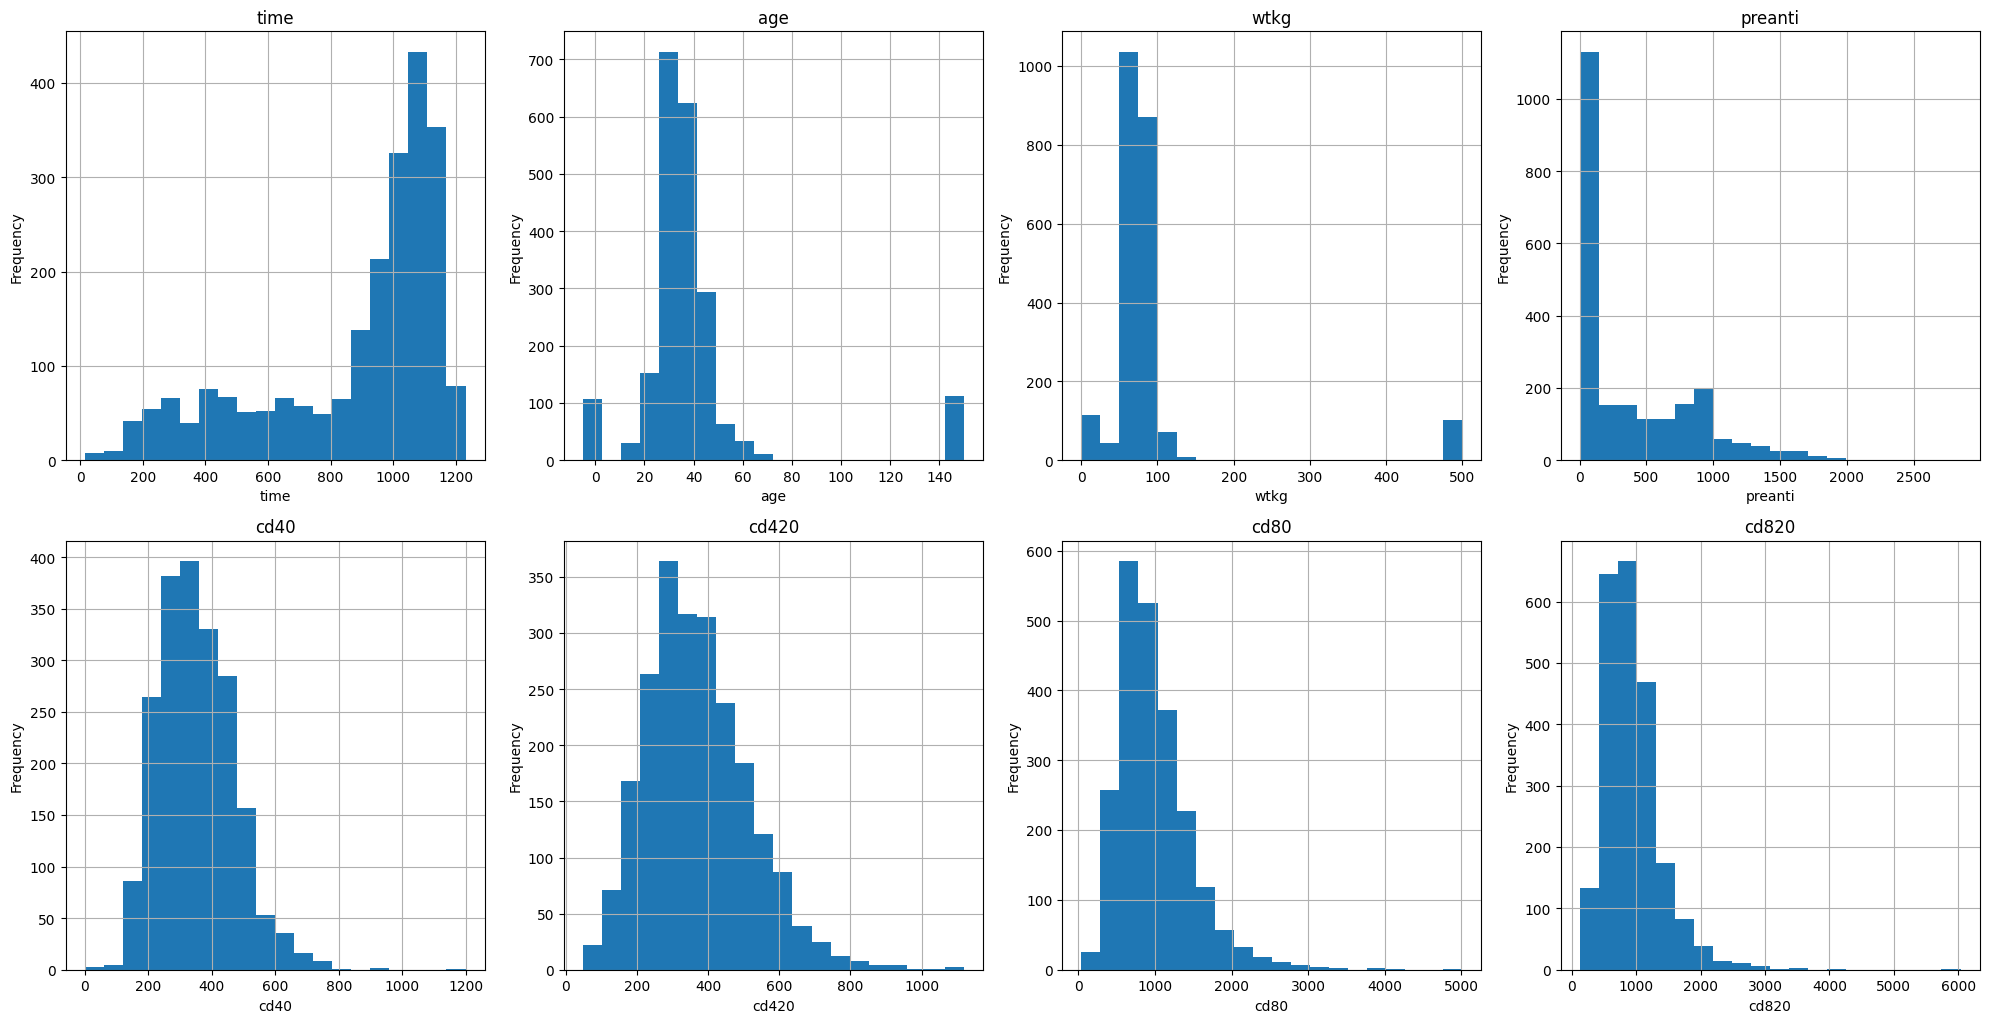

In [ ]:
# Memvisualisasikan histogram untuk kolom numerik
plot_histograms(data, num_cols)

### Menganalisis hubungan antara kolom kategorikal dan target

<Figure size 500x500 with 0 Axes>

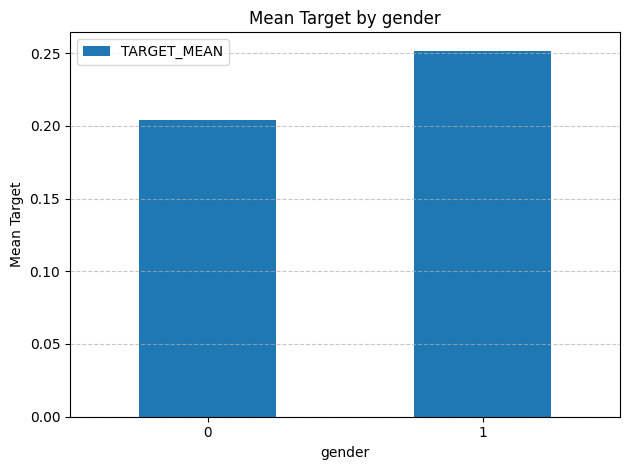

        TARGET_MEAN
gender             
0          0.204134
1          0.251748
--------------------------------------------------


In [ ]:
# Menjalankan analisis hubungan antara kolom kategorikal dan target
target_summary_with_cat_visualized(data, 'infected', 'gender')

### Menganalisis hubungan antara kolom numerik dan target

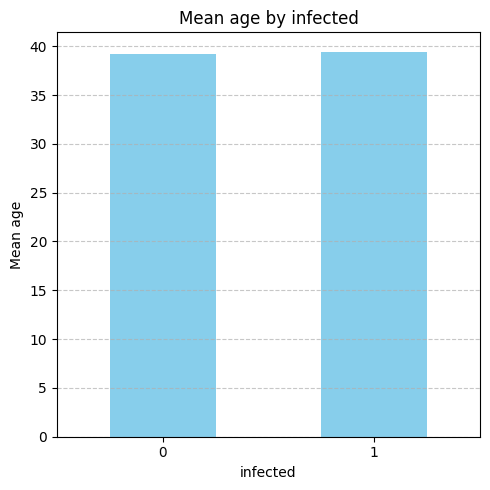

                age
infected           
0         39.208256
1         39.458414
--------------------------------------------------


In [ ]:
# Menjalankan analisis hubungan antara kolom numerical dan target
target_summary_with_num_visualized(data, "infected", "age")

### Menampilkan boxplot untuk kolom numerik

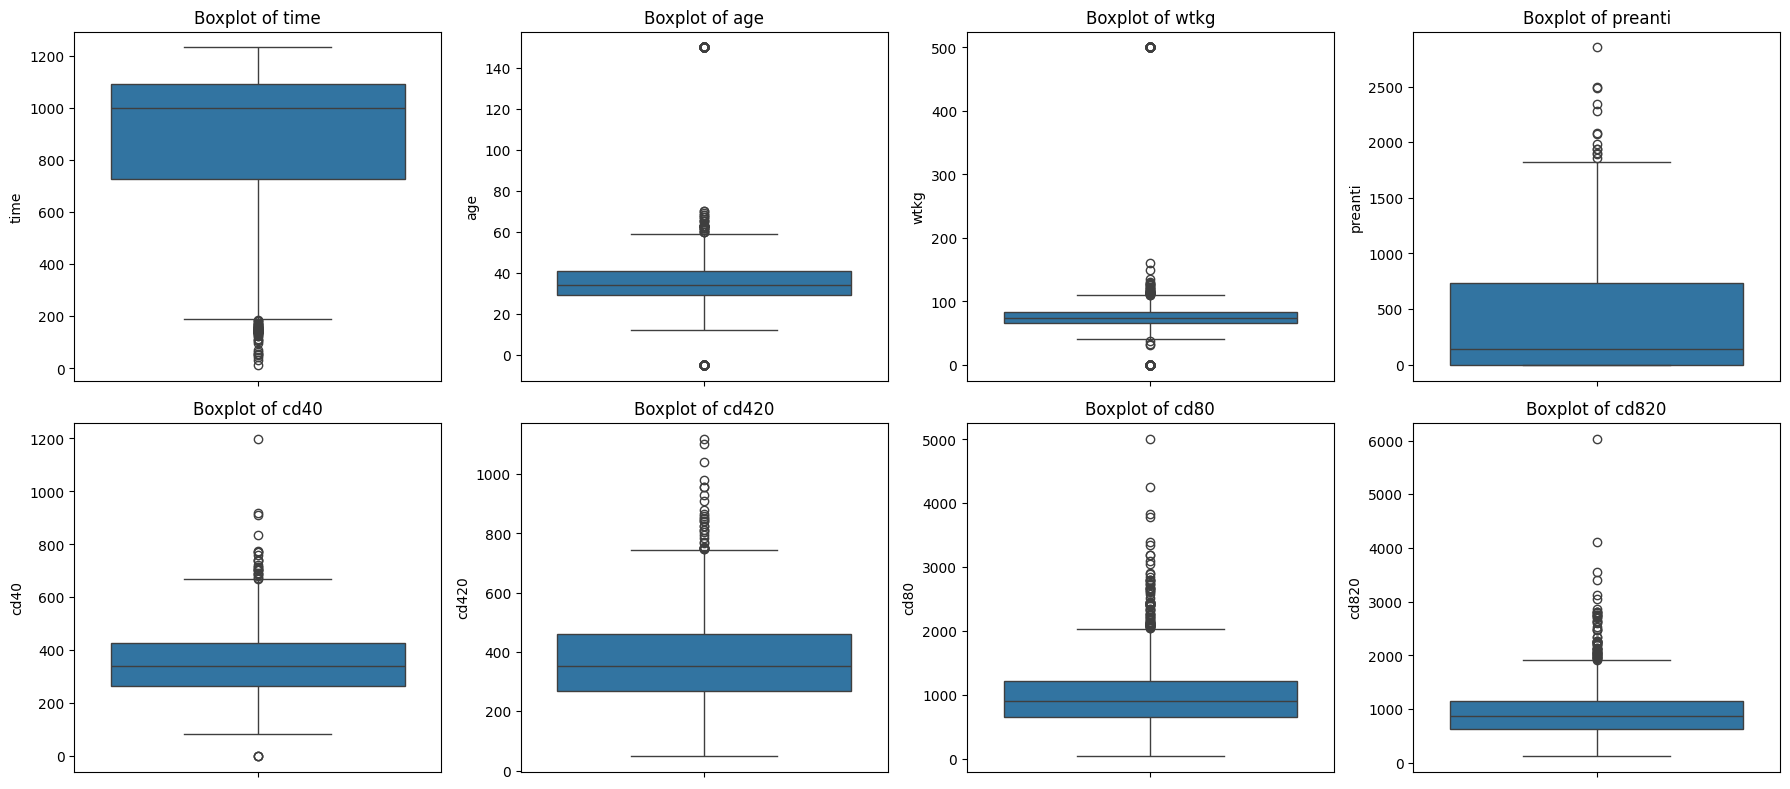

In [ ]:
# Menampilkan boxplot untuk kolom numerik
boxplot(data, num_cols)

saya melakukan pengecekan atas data yang digunakan apakah terdapat missing value, noisy data, atau data yang tidak sesuai lainnya

### Cek Data Unik

In [ ]:
# Menghitung jumlah nilai unik untuk setiap kolom
unique_values = {}
for col in data.columns:
    unique_count = data[col].nunique()
    unique_values[col] = unique_count

for col, count in unique_values.items():
    print(f"{col:<30} : {count}")

time                           : 713
trt                            : 5
age                            : 61
wtkg                           : 646
hemo                           : 2
homo                           : 2
drugs                          : 2
karnof                         : 4
oprior                         : 2
z30                            : 2
preanti                        : 813
race                           : 2
gender                         : 2
str2                           : 2
strat                          : 3
symptom                        : 2
treat                          : 2
offtrt                         : 2
cd40                           : 473
cd420                          : 570
cd80                           : 1090
cd820                          : 1050
infected                       : 2


### Temuan


Yang saya lakukan adalah mengoprasikan beberapa function yang telah dibuat menjadi visualisasi:

1. Ada beberapa kolom numerik yang berupa kolom kategori yaitu Kolom: 'trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected'

2. Dan terdapat juga kolom numerik yang asli: 'time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820'

3. Memvisualisasikan distribusi kolom kategori dan numerik

## 4) Menentukan Object Data <a class="anchor" id="h4"></a>

In [ ]:
# Menampilkan 5 baris pertama dari dataframe data
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48.0,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422.0,477,566,324,0
1,1002,3,61.0,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162.0,218,392,564,1
2,961,3,45.0,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326.0,274,2063,1893,0
3,1166,3,47.0,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287.0,394,1590,966,0
4,1090,0,43.0,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504.0,353,870,782,0


In [ ]:
# Menampilkan 5 baris terakhir dari dataframe data
data.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2241,987,1,150.0,67.8132,0,1,0,100,0,0,65,0,1,1,2,0,1,1,320.0,320,1860,1290,0
2242,1126,3,150.0,78.4728,0,1,0,100,0,1,967,0,1,1,3,0,1,0,365.0,265,1964,1546,0
2243,373,2,31.0,75.2976,0,1,0,100,0,1,1538,0,1,1,3,1,1,1,344.0,291,1607,1543,1
2244,1081,1,40.0,70.0812,0,0,1,80,0,0,0,0,0,0,1,0,1,1,400.0,550,1250,1020,0
2245,824,1,40.0,68.0400,0,1,0,100,0,0,0,1,1,0,1,0,1,1,477.0,566,542,616,0


In [ ]:
# Menampilkan informasi ringkas tentang dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2246 non-null   int64  
 1   trt       2246 non-null   int64  
 2   age       2140 non-null   float64
 3   wtkg      2246 non-null   float64
 4   hemo      2246 non-null   int64  
 5   homo      2246 non-null   int64  
 6   drugs     2246 non-null   int64  
 7   karnof    2246 non-null   int64  
 8   oprior    2246 non-null   int64  
 9   z30       2246 non-null   int64  
 10  preanti   2246 non-null   int64  
 11  race      2246 non-null   int64  
 12  gender    2246 non-null   int64  
 13  str2      2246 non-null   int64  
 14  strat     2246 non-null   int64  
 15  symptom   2246 non-null   int64  
 16  treat     2246 non-null   int64  
 17  offtrt    2246 non-null   int64  
 18  cd40      2025 non-null   float64
 19  cd420     2246 non-null   int64  
 20  cd80      2246 non-null   int6

menghitung jumlah fitur pada dataset

In [ ]:
# Menghitung frekuensi kemunculan nilai unik dalam sebuah kolom atau objek Pandas
data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,count
time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,
755,1,26.0,57.5000,0,1,0,90,0,0,0,1,1,0,1,0,1,1,551.0,497,1914,1490,0,2
1138,2,28.0,58.6000,0,1,0,100,0,1,890,0,1,1,3,0,1,0,470.0,590,1080,1090,0,2
901,3,35.0,500.0000,0,1,0,90,0,0,0,0,1,0,1,0,1,1,421.0,374,1079,1104,1,2
646,1,35.0,77.5000,0,1,0,90,0,1,722,0,1,1,3,1,1,0,280.0,265,1703,1020,1,2
986,3,37.0,89.7000,0,1,0,100,0,0,0,0,1,0,1,0,1,0,390.0,290,1090,910,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,1,37.0,76.4316,0,0,0,100,0,0,0,1,0,0,1,0,1,0,548.0,428,1949,1099,0,1
891,2,23.0,93.8952,0,0,0,90,0,0,0,1,0,0,1,0,1,1,400.0,510,730,860,0,1
890,1,40.0,90.7200,0,1,0,80,0,0,0,0,1,0,1,0,1,1,439.0,298,1468,890,0,1


## 5) Membersihkan Data <a class="anchor" id="h5"></a>
Lakukan pembersihan, sesuai dengan dengan hasil eksplorasi mu!

In [ ]:
# menghitung nilai Null pada dataset
data.isnull().sum()

,0
time,0
trt,0
age,106
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


In [ ]:
# mendeteksi keberadaan nilai Null
data.loc[:, data.isnull().any()].columns

Index(['age', 'cd40'], dtype='object')

In [ ]:
# Menampilkan Informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2246 non-null   int64  
 1   trt       2246 non-null   int64  
 2   age       2140 non-null   float64
 3   wtkg      2246 non-null   float64
 4   hemo      2246 non-null   int64  
 5   homo      2246 non-null   int64  
 6   drugs     2246 non-null   int64  
 7   karnof    2246 non-null   int64  
 8   oprior    2246 non-null   int64  
 9   z30       2246 non-null   int64  
 10  preanti   2246 non-null   int64  
 11  race      2246 non-null   int64  
 12  gender    2246 non-null   int64  
 13  str2      2246 non-null   int64  
 14  strat     2246 non-null   int64  
 15  symptom   2246 non-null   int64  
 16  treat     2246 non-null   int64  
 17  offtrt    2246 non-null   int64  
 18  cd40      2025 non-null   float64
 19  cd420     2246 non-null   int64  
 20  cd80      2246 non-null   int6

In [ ]:
import missingno

<Axes: >

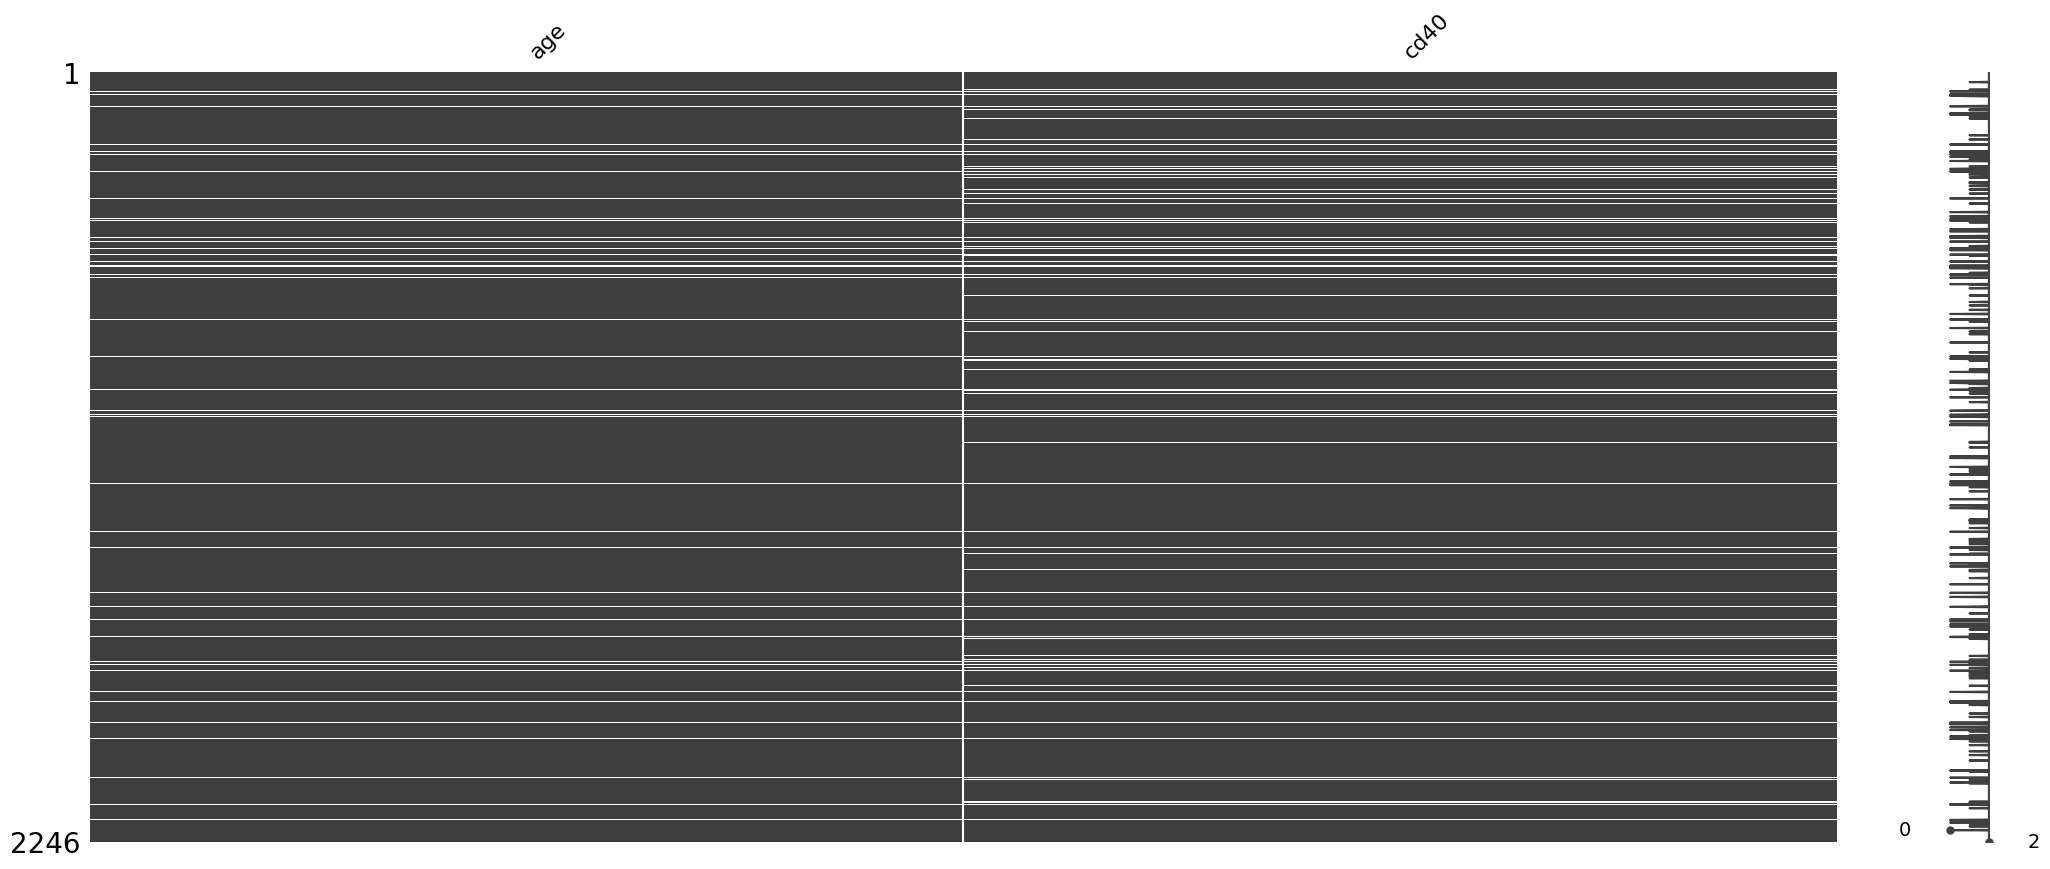

In [ ]:
# Memvisualisasikan keberadaan nilai Null
missingdata_df = data.columns[data.isnull().any()].tolist()
missingno.matrix(data[missingdata_df])

In [ ]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True), jika tidak maka

# median_value=dataset['fitur'].median()
# dataset['fitur'] =dataset['fitur'].fillna(median_value))

# mean_value = dataset['Bare_nuclei'].mean()
# dataset['Bare_nuclei'] = dataset['Bare_nuclei'].fillna(mean_value)

# mode_value = dataset['Bare_nuclei'].mode()[0]
# dataset['Bare_nuclei'] = dataset['Bare_nuclei'].fillna(mode_value)

# random_sample = df['Bare_nuclei'].dropna().sample(df['Bare_nuclei'].isna().sum())
# random_sample.index = df[df['Bare_nuclei'].isnull()].index
# df.loc[df['Bare_nuclei'].isnull(), 'Bare_nuclei'] = random_sample

In [ ]:
mean_value = data['age'].mean()
data['age'] = data['age'].fillna(mean_value)

mean_value = data['cd40'].mean()
data['cd40'] = data['cd40'].fillna(mean_value)

In [ ]:
data.isnull().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


In [ ]:
# Check apakah terdapat data duplikasi
data.duplicated().sum()

107

In [ ]:
# Menampilkan data duplikat
duplicate_rows = data.duplicated()
print("All Duplicate Rows:")
data[data.duplicated(keep=False)]

All Duplicate Rows:


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
33,1206,3,37.0,73.0000,0,0,0,100,0,0,0,1,0,0,1,0,1,0,342.0,293,1459,1646,0
35,1074,1,38.0,87.0000,0,1,1,90,0,1,67,0,1,1,2,1,1,1,496.0,465,2127,2753,0
52,1089,3,39.0,77.5000,0,1,0,80,0,1,35,0,1,1,2,0,1,0,293.0,260,730,604,0
74,1214,999,48.0,0.1000,0,0,1,100,0,1,163,1,1,1,2,0,0,0,430.0,390,1370,1780,0
83,1138,2,28.0,58.6000,0,1,0,100,0,1,890,0,1,1,3,0,1,0,470.0,590,1080,1090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,987,1,150.0,67.8132,0,1,0,100,0,0,65,0,1,1,2,0,1,1,320.0,320,1860,1290,0
2242,1126,3,150.0,78.4728,0,1,0,100,0,1,967,0,1,1,3,0,1,0,365.0,265,1964,1546,0
2243,373,2,31.0,75.2976,0,1,0,100,0,1,1538,0,1,1,3,1,1,1,344.0,291,1607,1543,1
2244,1081,1,40.0,70.0812,0,0,1,80,0,0,0,0,0,0,1,0,1,1,400.0,550,1250,1020,0


In [ ]:
# lakukan cleaning data disini
# Menghapus data duplikat, menyimpan data dalam variabel data_clean
data_clean = data.drop_duplicates()
print("All Duplicate Rows:")
data_clean[data_clean.duplicated(keep=False)]

All Duplicate Rows:


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2246 non-null   int64  
 1   trt       2246 non-null   int64  
 2   age       2246 non-null   float64
 3   wtkg      2246 non-null   float64
 4   hemo      2246 non-null   int64  
 5   homo      2246 non-null   int64  
 6   drugs     2246 non-null   int64  
 7   karnof    2246 non-null   int64  
 8   oprior    2246 non-null   int64  
 9   z30       2246 non-null   int64  
 10  preanti   2246 non-null   int64  
 11  race      2246 non-null   int64  
 12  gender    2246 non-null   int64  
 13  str2      2246 non-null   int64  
 14  strat     2246 non-null   int64  
 15  symptom   2246 non-null   int64  
 16  treat     2246 non-null   int64  
 17  offtrt    2246 non-null   int64  
 18  cd40      2246 non-null   float64
 19  cd420     2246 non-null   int64  
 20  cd80      2246 non-null   int6

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   float64
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   float64
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int64  
 

### Essay
Apa yang kamu lakukan untuk membersihkan data tersebut?

### Temuan

Saya mengimputasi nilai yang hilang (null) pada kolom dengan menggunakan nilai rata-rata (mean), dan menghapus duplikasi data pada baris yang teridentifikasi sebagai duplikat.

## 6) Konstruksi Data <a class="anchor" id="h6"></a>

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [ ]:
# Memberikan informasi detail tentang struktur dataframe
data_clean.info() # data_clean sebagai dataset yang telah bersih

<class 'pandas.core.frame.DataFrame'>
Index: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   float64
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   float64
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int64  
 

In [ ]:
# Memberikan ringkasan statistik deskriptif dari kolom numerik
data_clean.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,51.428237,39.206829,90.439055,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.822212,371.307153,986.627396,935.369799,0.243572
std,292.274324,217.494958,28.060296,91.171807,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,113.211194,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,-5.000000,0.100000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,65.318400,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,273.000000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,35.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,351.157531,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,41.000000,83.462400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,417.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,999.000000,150.000000,500.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [ ]:
# Menampilkan 5 baris pertama
data_clean.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48.0,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422.0,477,566,324,0
1,1002,3,61.0,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162.0,218,392,564,1
2,961,3,45.0,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326.0,274,2063,1893,0
3,1166,3,47.0,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287.0,394,1590,966,0
4,1090,0,43.0,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504.0,353,870,782,0


## 7) Menentukan Label <a class="anchor" id="h7"></a>

Setelah selesai menyesuaikan kita pisah dataset dan label

In [ ]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data_clean.drop("infected", axis = 1)
y = data_clean["infected"]

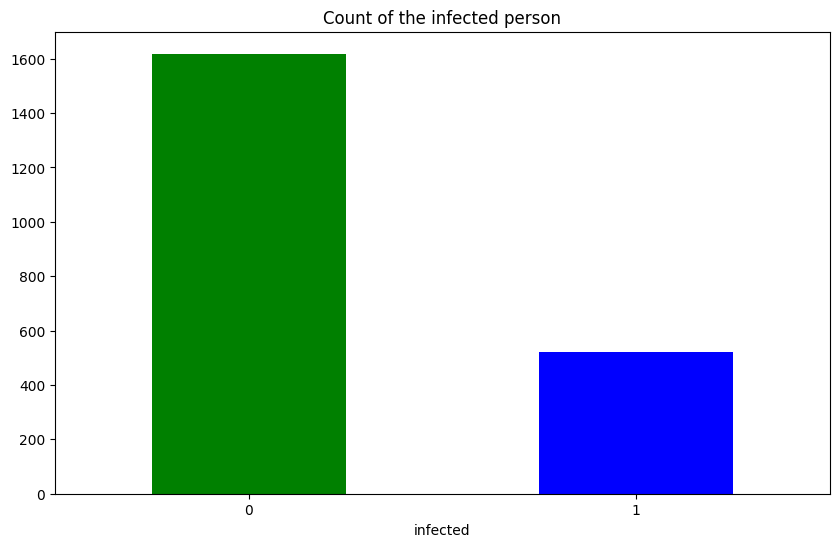

In [ ]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data_clean['infected'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the infected person")
plt.xticks(rotation=0);

Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu. Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling. oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling dilakukan jika jumlah data terlalu banyak.
<br>
Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita gunakan adalah SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE # Library untuk membantu oversampling dengan teknik SMOTE

In [ ]:
smote = SMOTE(random_state=42) # Inisialisasi SMOTE
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y) # Mengaplikasikan oversampling pada dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


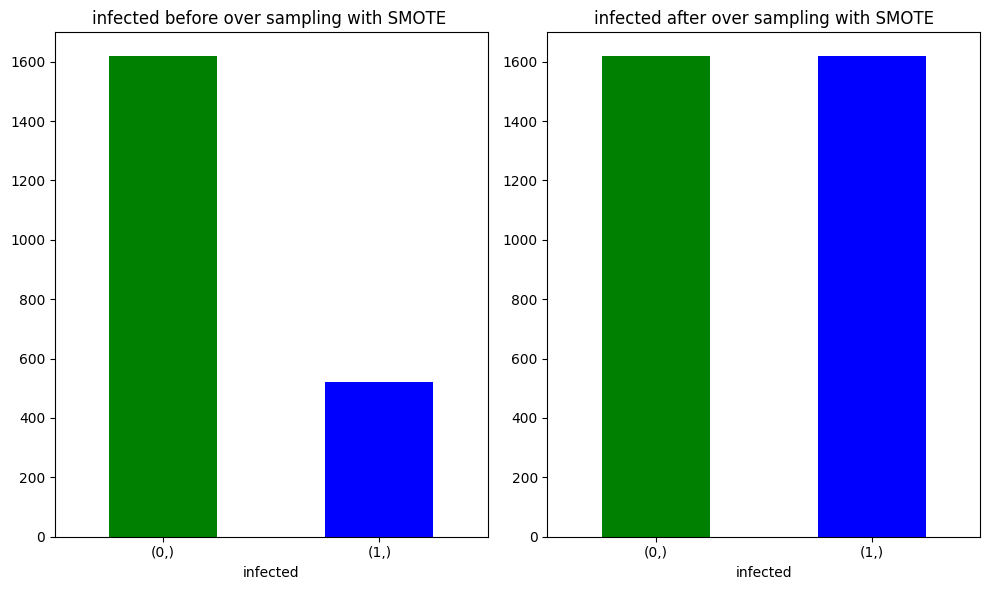

In [ ]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("infected after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

Lakukan pembagian data menjadi latih dan data testing

In [ ]:
from sklearn.model_selection import train_test_split # Library untuk membantu memisahkan data menjadi dataset latih dan dataset validasi
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled) # 80% data latih, 20% data test

## 8) Model <a class="anchor" id="h7"></a>
Gunakan sebuah model klaisifikasi sebagai algoritma yang disarankan untuk pelatihan!

In [ ]:
# Latih model mu disini

In [ ]:
# import library pemodelan yang digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb .fit(X_smote_resampled, y_smote_resampled)

GaussianNB()

In [ ]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt .fit(X_smote_resampled, y_smote_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf .fit(X_smote_resampled, y_smote_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# AdaBoost Classifier
clean_classifier_ab = AdaBoostClassifier(n_estimators=50, random_state=42)
clean_classifier_ab.fit(X_smote_resampled, y_smote_resampled)

AdaBoostClassifier(random_state=42)

In [ ]:
# K-Nearest Neighbors
clean_classifier_knn = KNeighborsClassifier(n_neighbors=5)
clean_classifier_knn.fit(X_smote_resampled, y_smote_resampled)

KNeighborsClassifier()

### Essay
Deskripsikan yang kamu lakukan!

Mengimpor Library Pemodelan
Tiga jenis model klasifikasi diimpor dari library scikit-learn:

GaussianNB: Model Naive Bayes untuk data yang diasumsikan memiliki distribusi Gaussian.
DecisionTreeClassifier: Model pohon keputusan untuk klasifikasi berbasis pemisahan hierarkis data.
RandomForestClassifier: Model ensemble berbasis sekumpulan pohon keputusan (Random Forest).

Melatih Model dengan Data yang Telah Resampled
Data latih hasil oversampling menggunakan SMOTE (Synthetic Minority Oversampling Technique), yakni X_smote_resampled (fitur) dan y_smote_resampled (label), digunakan untuk melatih model.

Ketiga model dilatih menggunakan data yang telah disesuaikan untuk mengatasi ketidakseimbangan kelas (imbalance dataset). Tujuan utama adalah membandingkan performa ketiga model pada data yang telah diresample, sehingga dapat dipilih model terbaik berdasarkan evaluasi berikutnya (misalnya, akurasi, F1-score, atau metrik lainnya).

## 9) Evaluasi <a class="anchor" id="h9"></a>
Evaluasi performa model yang telah kamu latih!

In [ ]:
# Evaluasi disini

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [ ]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [ ]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Naive Bayes
print("\nNaive Bayes Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model:
Accuracy: 0.801
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       324
           1       0.77      0.85      0.81       324

    accuracy                           0.80       648
   macro avg       0.80      0.80      0.80       648
weighted avg       0.80      0.80      0.80       648



In [ ]:
evaluation(y_test,y_pred_nb)

{'accuracy': 0.801, 'recall': 0.801, 'F1 score': 0.8, 'Precision score': 0.804}


In [ ]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00       324

    accuracy                           1.00       648
   macro avg       1.00      1.00      1.00       648
weighted avg       1.00      1.00      1.00       648



In [ ]:
evaluation(y_test,y_pred_dt)

{'accuracy': 1.0, 'recall': 1.0, 'F1 score': 1.0, 'Precision score': 1.0}


In [ ]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00       324

    accuracy                           1.00       648
   macro avg       1.00      1.00      1.00       648
weighted avg       1.00      1.00      1.00       648



In [ ]:
evaluation(y_test,y_pred_rf)

{'accuracy': 1.0, 'recall': 1.0, 'F1 score': 1.0, 'Precision score': 1.0}


In [ ]:
# Prediksi menggunakan model AdaBoost
y_pred_ab = clean_classifier_ab.predict(X_test)

# Evaluate the AdaBoost model
print("\nAdaBoost Model:")
accuracy_ab = round(accuracy_score(y_test, y_pred_ab), 3)
print("Accuracy:", accuracy_ab)
print("Classification Report:")
print(classification_report(y_test, y_pred_ab))


AdaBoost Model:
Accuracy: 0.917
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       324
           1       0.90      0.94      0.92       324

    accuracy                           0.92       648
   macro avg       0.92      0.92      0.92       648
weighted avg       0.92      0.92      0.92       648



In [ ]:
evaluation(y_test, y_pred_ab)

{'accuracy': 0.917, 'recall': 0.917, 'F1 score': 0.917, 'Precision score': 0.917}


In [ ]:
# Prediksi menggunakan model K-Nearest Neighbors (KNN)
y_pred_knn = clean_classifier_knn.predict(X_test)

# Evaluate the K-Nearest Neighbors model
print("\nK-Nearest Neighbors Model:")
accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))



K-Nearest Neighbors Model:
Accuracy: 0.927
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       324
           1       0.89      0.98      0.93       324

    accuracy                           0.93       648
   macro avg       0.93      0.93      0.93       648
weighted avg       0.93      0.93      0.93       648



In [ ]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.927, 'recall': 0.927, 'F1 score': 0.927, 'Precision score': 0.932}


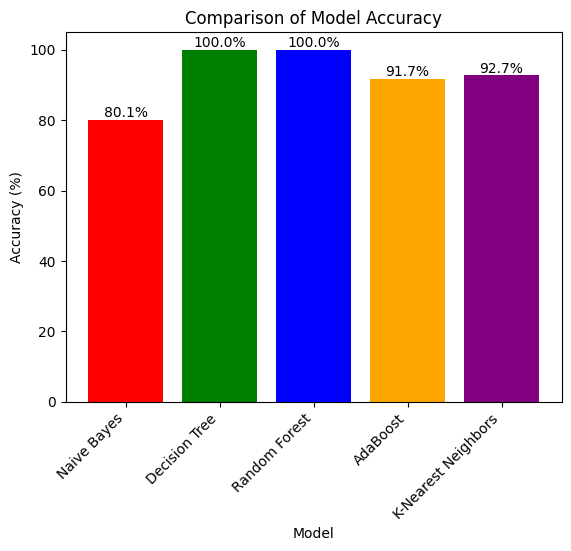

In [ ]:
model_comp = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_nb * 100, accuracy_dt * 100, accuracy_rf * 100, accuracy_ab * 100, accuracy_knn * 100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{round(yval, 2)}%", ha='center', va='bottom')

plt.show()

### Essay
Deskripsikan temuanmu disini!

Dari grafik yang ditampilkan, kita melihat perbandingan akurasi antara tiga model yang diuji pada data yang sudah dibersihkan (clean data). Model-model yang diuji adalah:

Naive Bayes:

1.   Naive Bayes memiliki Akurasi: 80.1%. Model Naive Bayes menunjukkan akurasi yang lebih rendah dibandingkan dengan dua model lainnya. Meskipun ini masih cukup baik, ada potensi untuk model ini meningkatkan performa dengan penyesuaian lebih lanjut pada parameter atau dengan menggunakan teknik lain.
2.   Decision Tree dan Random Forest memiliki Akurasi: 100.0%. Decision Tree memberikan akurasi sempurna pada data yang sudah dibersihkan, yang menunjukkan bahwa model ini sangat efektif dalam mengklasifikasikan data dalam kasus ini. Mungkin ada overfitting, sehingga model terlalu disesuaikan dengan data pelatihan, atau data yang diberikan sangat mudah untuk dipisahkan oleh pohon keputusan. Random Forest juga menunjukkan akurasi sempurna, yang menunjukkan bahwa teknik ensemble ini bekerja dengan baik. Random Forest bekerja dengan menggabungkan beberapa pohon keputusan, meningkatkan stabilitas dan mengurangi kemungkinan overfitting.

Kesimpulan :
Decision Tree dan Random Forest tampaknya lebih efektif dalam memodelkan data yang sudah dibersihkan, menghasilkan akurasi sempurna.
Sedangkan Naive Bayes, meskipun masih memberikan hasil yang baik, menunjukkan performa yang lebih rendah dalam hal akurasi pada data yang telah dibersihkan.